In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# count the number of images in the respective classes 1 - Kidney tumor and 0 - Normal
ROOT_DIR ="/content/data"

In [6]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset/data1.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [7]:
!ls /content/data/

Normal	Tumor


In [8]:
X = []
Y = []
labels = {'Normal': 0 , 'Tumor' : 1}
for label in labels:
  path = '/content/data/'+label
  for image in  os.listdir(path):
    img = cv2.imread(path+'/'+image,0)
    img = cv2.resize(img,(128,128))
    X.append(img)
    Y.append(labels[label])

In [9]:
np.unique(Y)

array([0, 1])

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
pd.Series(Y).value_counts()

0    5077
1    2283
dtype: int64

In [12]:
X.shape

(7360, 128, 128)

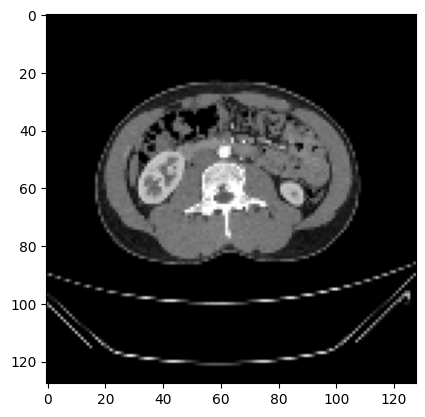

In [13]:
plt.imshow(X[4414],cmap='gray')

In [14]:
# Flattening the images to convert into 2D data
X_new = X.reshape(len(X),-1)
X_new.shape

(7360, 16384)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,random_state = 10,test_size=.30)

In [16]:
X_train.shape,X_test.shape

((5152, 16384), (2208, 16384))

In [17]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [18]:
from sklearn.svm import SVC

# creating SVC model and get rid of overfitting
clf = SVC(kernel='rbf', C=2.0, gamma='auto')
clf.fit(X_train,Y_train)

SVC(C=2.0, gamma='auto')

In [ ]:
print('Traning Scores :',clf.score(X_train,Y_train))
print('Testing Scores :',clf.score(X_test,Y_test))

# Auccuracy of the model , F1 score , Confusion matrix , Precision and Recall
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

Y_pred = clf.predict(X_test)
print('Accuracy Score :',accuracy_score(Y_test,Y_pred))

print('Confusion Matrix :',confusion_matrix(Y_test,Y_pred))

print('Classification Report :',classification_report(Y_test,Y_pred))

print('Precision Score :',precision_score(Y_test,Y_pred))

print('Recall Score :',recall_score(Y_test,Y_pred))

print('F1 Score :',f1_score(Y_test,Y_pred))


Traning Scores : 0.9901009316770186
Testing Scores : 0.9827898550724637
